In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
dataset=pd.read_csv("C://Users//kipal//Downloads//bestsellers with categories.csv")

In [42]:
dataset.head()


,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [4]:
dataset.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [5]:
dataset.sample(10)

,Name,Author,User Rating,Reviews,Price,Year,Genre
520,Under the Dome: A Novel,Stephen King,4.3,6740,20,2009,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
119,Game of Thrones Boxed Set: A Game of Thrones/A...,George R.R. Martin,4.6,5594,5,2012,Fiction
318,The 17 Day Diet: A Doctor's Plan Designed for ...,Mike Moreno,4.3,2314,22,2011,Non Fiction
71,"Diary of a Wimpy Kid: Hard Luck, Book 8",Jeff Kinney,4.8,6812,0,2013,Fiction
286,Ready Player One: A Novel,Ernest Cline,4.6,22536,12,2017,Fiction
410,The Hunger Games Trilogy Boxed Set (1),Suzanne Collins,4.8,16949,30,2011,Fiction
253,Old School (Diary of a Wimpy Kid #10),Jeff Kinney,4.8,6169,7,2015,Fiction
533,When Breath Becomes Air,Paul Kalanithi,4.8,13779,14,2016,Non Fiction
402,The Help,Kathryn Stockett,4.8,13871,6,2009,Fiction


In [6]:
dataset.tail()

,Name,Author,User Rating,Reviews,Price,Year,Genre
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction
549,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2019,Non Fiction


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [8]:
dataset.shape

(550, 7)

In [12]:
for col in dataset.columns:
    print(col,len(dataset[col].unique()) ,dataset[col].unique())

Name 351 ['10-Day Green Smoothie Cleanse' '11/22/63: A Novel'
 '12 Rules for Life: An Antidote to Chaos' '1984 (Signet Classics)'
 '5,000 Awesome Facts (About Everything!) (National Geographic Kids)'
 'A Dance with Dragons (A Song of Ice and Fire)'
 'A Game of Thrones / A Clash of Kings / A Storm of Swords / A Feast of Crows / A Dance with Dragons'
 'A Gentleman in Moscow: A Novel'
 'A Higher Loyalty: Truth, Lies, and Leadership'
 'A Man Called Ove: A Novel'
 "A Patriot's History of the United States: From Columbus's Great Discovery to the War on Terror"
 'A Stolen Life: A Memoir' 'A Wrinkle in Time (Time Quintet)'
 'Act Like a Lady, Think Like a Man: What Men Really Think About Love, Relationships, Intimacy, and Commitment'
 'Adult Coloring Book Designs: Stress Relief Coloring Book: Garden Designs, Mandalas, Animals, and Paisley Patterns'
 'Adult Coloring Book: Stress Relieving Animal Designs'
 'Adult Coloring Book: Stress Relieving Patterns'
 'Adult Coloring Books: A Coloring Book fo

In [9]:
dataset.describe(include="O")

,Name,Author,Genre
count,550,550,550
unique,351,248,2
top,Publication Manual of the American Psychologic...,Jeff Kinney,Non Fiction
freq,10,12,310


In [21]:
print("Unique values in 'Year':", dataset['Year'].unique())


Unique values in 'Year': [2016 2011 2018 2017 2019 2014 2010 2009 2015 2013 2012]


In [13]:
dataset.dtypes

Name            object
Author          object
User Rating    float64
Reviews          int64
Price            int64
Year             int64
Genre           object
dtype: object

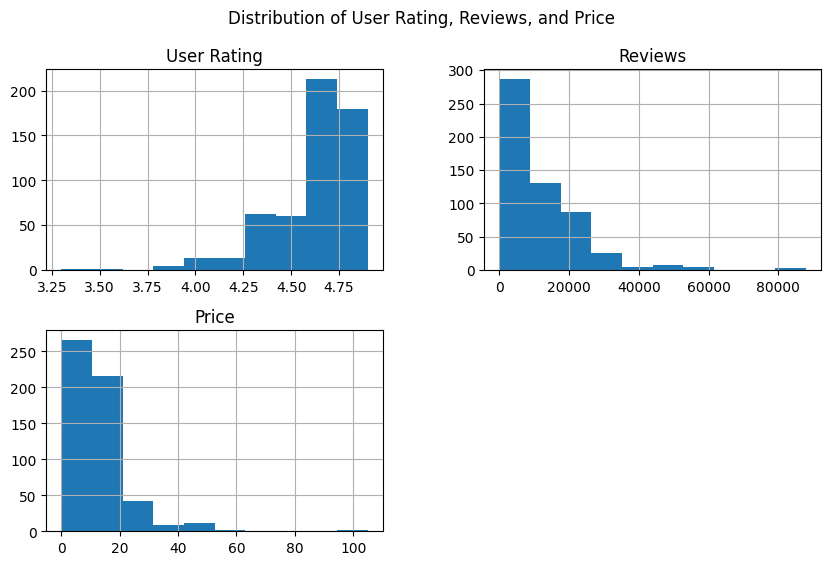

In [22]:

dataset[['User Rating', 'Reviews', 'Price']].hist(bins=10, figsize=(10, 6))
plt.suptitle("Distribution of User Rating, Reviews, and Price")
plt.show()


In [14]:
dataset.head()


,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


Text(0, 0.5, 'User Rating')

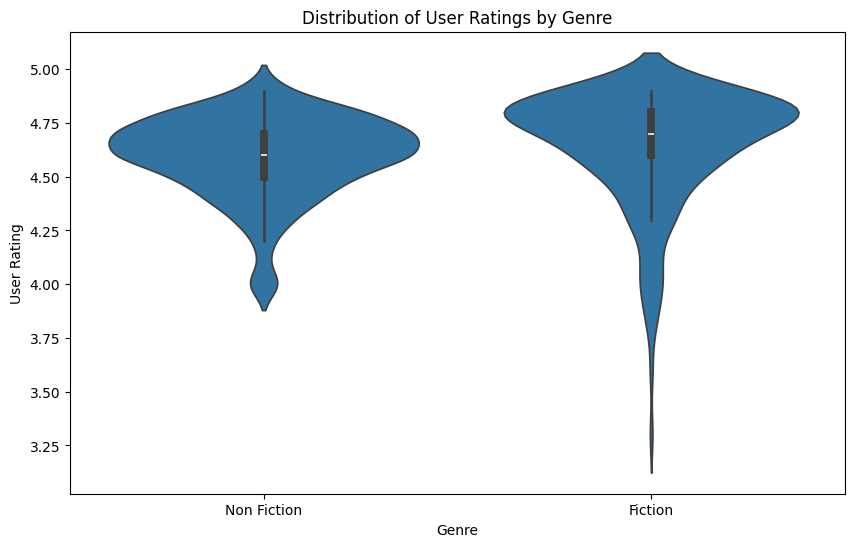

In [19]:
plt.figure(figsize=(10, 6))
sns.violinplot(x="Genre", y="User Rating", data=dataset)
plt.title("Distribution of User Ratings by Genre")
plt.xlabel("Genre")
plt.ylabel("User Rating")


In [11]:
list(dataset.Genre.unique())

['Non Fiction', 'Fiction']

In [12]:
dataset.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [24]:
genre= {"Fiction": 0,  "Non Fiction": 1} 
dataset['Genre']= dataset['Genre'].replace(genre)

In [16]:
dataset.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,1
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,0
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,1
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,0
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,1


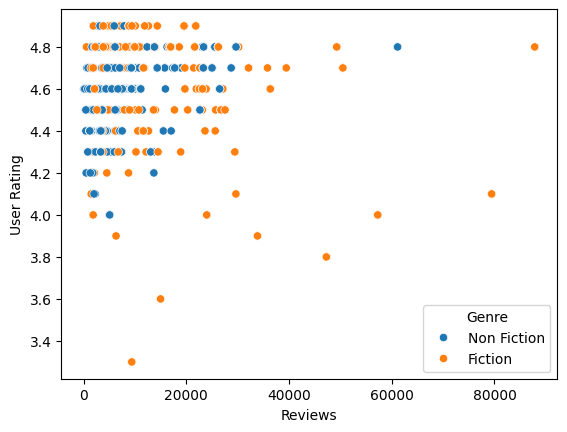

In [24]:
sns.scatterplot(x="Reviews", y="User Rating", hue="Genre", data=dataset)
plt.show()

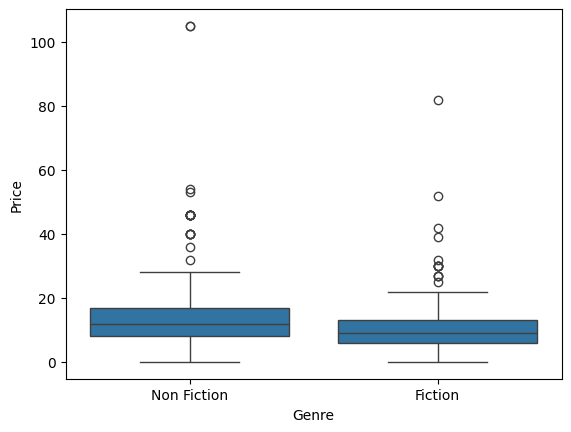

In [26]:
sns.boxplot(x="Genre", y="Price", data=dataset)
plt.show()

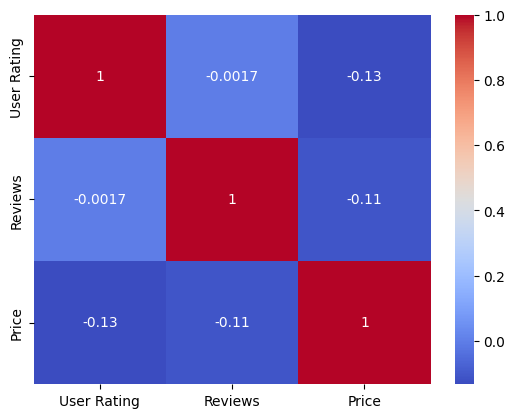

In [27]:
sns.heatmap(dataset[['User Rating', 'Reviews', 'Price']].corr(), annot=True, cmap="coolwarm")
plt.show()

Knn Classification

In [33]:
X = dataset[['User Rating', 'Reviews', 'Price', 'Year']]
y = dataset['Genre'].apply(lambda x: 1 if x == "Fiction" else 0)  # Encoding Genre: 1 for Fiction, 0 for Non Fiction


In [34]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [35]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [37]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [38]:
y_pred = knn.predict(X_test)

In [39]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7575757575757576

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.79      0.78        91
           1       0.74      0.72      0.73        74

    accuracy                           0.76       165
   macro avg       0.76      0.75      0.75       165
weighted avg       0.76      0.76      0.76       165


Confusion Matrix:
 [[72 19]
 [21 53]]


In [43]:
import os

# Get the current working directory
current_directory = os.getcwd()
print(current_directory)


C:\Windows\system32
